- [Otto Group Product Classification](#Otto-Group-Product-Classification)
    - [Contexto](#Contexto)
    - [Dados](#Dados)
- [Benchmark](#Benchmark)
- [Cross Validation](#Cross-Validation)
- [Tratamento](#Tratamento)
    - [Correlação](#Correlação)
    - [Filtrando colunas](#Filtrando-colunas)
    - [Resultado](#Resultado)
- [Train/Test split](#Train/Test-split)
    - [Feature Scaling](#Feature-Scaling)
    - [Confusion Matrix](#Confusion-Matrix)
- [Modelo Dummy Classifier](#Modelo-Dummy-Classifier)
- [Boosting](#Boosting)
- [Gradient Descent](#Gradient-Descent)
- [XGBoost](#XGBoost)
    - [Model](#Model)
        - [Objective Function:](#Objective-Function:)
        - [CART](#CART)
    - [Training](#Training)
        - [Additive](#Additive)
- [GridSearchCV](#GridSearchCV)
    - [Aplicando GridSearchCV ao XGBClassifier:](#Aplicando-GridSearchCV-ao-XGBClassifier:)
    - [Aplicando GridSearchCV ao Decision Tree Classifier:](#Aplicando-GridSearchCV-ao-Decision-Tree-Classifier:)
- [Trees](#Trees)
    - [Decision Tree](#Decision-Tree)
    - [Distribuição dos dados](#Distribuição-dos-dados)
        - [Filtrar dados](#Filtrar-dados)
        - [Verificando resultado](#Verificando-resultado)
- [Random Forest](#Random-Forest)
    - [Utilizando o algoritmo](#Utilizando-o-algoritmo)
    - [Verificando com Cross Validation](#Verificando-com-Cross-Validation)
    - [Importancia das features para a RF](#Importancia-das-features-para-a-RF)
        - [Gini](#Gini)
            - [O indice](#O-indice)
            - [Para Decisions Trees](#Para-Decisions-Trees)
            - [Decrease Mean Importance](#Decrease-Mean-Importance)
    - [ExtraTrees](#ExtraTrees)
- [Neurônio Artificial](#Neurônio-Artificial)
    - [Entrada](#Entrada)
    - [Função agregadora](#Função-agregadora)
    - [Neurônio](#Neurônio)
    - [Formula](#Formula)
    - [MLP Classifier](#MLP-Classifier)
- [Conclusão](#Conclusão)
- [Referências Bibliográficas](#Referências-Bibliográficas)

# Otto Group Product Classification

Este notebook é uma proposta de solução utilizando técnicas de data-mining e machine learn para o problema de classificação de produtos da companhia Otto disponíveis em: [Kaggle (challenge): Otto group product classification](https://www.kaggle.com/c/otto-group-product-
classification-challenge)

## Contexto

Retirado da descrição do problema, temos que o grupo Otto é uma das maiores companhias de *e-commerce* do mundo, e possui s filiais em mais de 20 paises. Vendem milhões de produtos ao redor do mundo todos os dias com centezas de produtos sendo adicionados constantemente.

A análise de consistência da performance dos produtos deles é crucial, entretando, com a infraestrutura de escala global que possuem, produtos identicos são classifidados de maneira diferenciada. Entretanto a análise da qualidade dos produtos depende fortemente da acurácia na habilidade de agrupar produtos semelhantes. Quanto melhor for a classificação, mais intuitivamente eles ter um maior alcance com seus produtos.

## Dados

Foram disponibilizados 2 bases de dados separadas. A primeira delas contém 61878 registros com rótulo da classificação do produto e 144368 de registros sem o rótulo.

São um total de 93 características na qual não há a descrição do que significa cada uma delas.  Sendo que não há dados faltando. O range dos dados vão de 0 a 352.

In [1]:
# Configure to show multiples outputs from a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import math
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier


In [2]:
with zipfile.ZipFile('Datasets.zip') as ziped_file:
    with ziped_file.open('Datasets/train.csv') as train_file:
        df_train = pd.read_csv(train_file, header=0).set_index('id')
    with ziped_file.open('Datasets/test.csv') as test_file:
        df_test = pd.read_csv(test_file, header=0).set_index('id')
df_target = pd.DataFrame(df_train.pop('target')) # Get the target
df_target.target = pd.Categorical(df_target.target) # Transform target in Categorical type
df_target['categories'] = df_target.target.cat.codes # Add the codes in a columns
df_target.head() # Show target classes
df_train.head() # The train dataset
df_test.head() # It hasn't target

,target,categories
id,,
1,Class_1,0
2,Class_1,0
3,Class_1,0
4,Class_1,0
5,Class_1,0


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
2,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
3,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
5,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


# Benchmark

A variável results é um acumulador para salvar os resultados na base de treino e teste de cada um dos modelos e compará-los ao final.

Segue a estrutura:

`
 'modelo':
     'teste': value
     'treino': value
`

In [3]:
from sklearn.model_selection import train_test_split

results = {}
def add_results(model, train, test):
    results[model] = {
        'train': train*100,
        'test': test*100,
    }

# Cross Validation

A abordagem para a Validação Cruzada é a utilização do método de k-partições. Neste método, o conjunto de dados é dividido em k partições [(WITTEN e FRANK, 2000)](ftp://ftp.ingv.it/pub/manuela.sbarra/Data%20Mining%20Practical%20Machine%20Learning%20Tools%20and%20Techniques%20-%20WEKA.pdf), testes extensivos em diversas bases de dados, utilizando diversos algoritmos, identificaram o valor de k para identificar a melhor margem de erro como sendo 10, também de forma randômica. Então, o conjunto de dados de treinamento é criado com k – 1 partições, e apenas uma partição é utilizada para testes. São realizadas k iterações, aonde cada partição é utilizada uma vez para testes enquanto as outras são utilizadas para treinamento. Após todas as partições terem sido utilizadas para teste, a margem de erro de cada iteração é somada e a média das k iterações se torna a margem de erro do modelo.

![cross val](crossval.png) 
<center>Representação do método Cross Validation com k = 10.
**Fonte**: BABATUNDE et al., 2015.</center>

# Tratamento

Será realizada as etapas de feature selection e feature engineering.  Correlação entre features Será realizada uma análise da correlação entre as features. Visto que há um total de 93 colunas que não foi disponibilizada nenhuma informação sobre o que são elas e o que representam e portanto, esta análize ajudará a identificar as relações entre as features.

## Correlação


A correlação entre duas variáveis é quando existe algum laço matemático que envolve o valor de duas variáveis de alguma forma [ESTATÍSTICA II - CORRELAÇÃO E REGRESSÃO](http://www.ctec.ufal.br/professor/mgn/05CorrelacaoERegressao.pdf).

Uma das maneiras mais simples de se identificar a correlação entre duas variáveis é plotando-as em um gráfico, para tentar identificar alguma relação entre elas, entretanto, como são um total de 93 features, dificulta visualizar a correlação em forma gráfica.

A correlação de [Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de%0A_Pearson) mede o grau da correlação (e a direcção dessa correlação - se positiva ou negativa) entre duas variáveis de escala métrica (intervalar ou de rácio/razão).

Já a correlação de [Spearman](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_postos_de_Spearman) entre duas variáveis é igual à correlação de Pearson entre os valores de postos daquelas duas variáveis. Enquanto a correlação de Pearson avalia relações lineares, a correlação de Spearman avalia relações monótonas, sejam elas lineares ou não.

Visto ambos os tipos de correlação, utilizaremos a de Pearson para avaliar se há alguma correlação linear crescente ou decrescente entre as variáveis, pois esta relação nos possibilita remover uma delas sem prejuizos aos modelos de machine learn.

In [4]:
shape = (df_train.shape[1], df_train.shape[1])
upper_matrix = np.tril(np.ones(shape)).astype(np.bool)
np.fill_diagonal(upper_matrix, False)
correlation = df_train.corr('pearson').abs().where(upper_matrix)
correlation

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
feat_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_2,0.031332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_3,0.027807,0.082573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_4,0.027529,0.134987,0.583523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_5,0.042973,0.020926,0.010880,1.729026e-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_6,0.043603,0.041343,0.004288,1.405895e-02,0.145355,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_7,0.298952,0.222386,0.001294,1.448981e-02,0.075047,0.088014,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_8,0.056321,0.019815,0.053462,4.618407e-02,0.035861,0.012867,0.038121,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_9,0.032285,0.025630,0.063551,4.624977e-02,0.024708,0.009373,0.027146,0.039281,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feat_10,0.097776,0.051925,0.036944,5.951396e-02,0.091324,0.041940,0.194258,0.000023,0.024323,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtrando colunas

A partir da matriz de correlação assima, buscamos agora identificar quais das colunas possuem uma forte correlação de acordo com a tabela a seguir.

Como sugerido por [Makuka,2012](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/)

 <center>Interpretação do resultado de correlação </center>

|Valor absoluto|Significado|
|---|---|
|0.9 < v | Muito forte |
|0.7 < v <= 0.9 | Forte |
|0.5 < v <= 0.7 | Moderada |
|0.3 < v <= 0.5 | Fraca |
|0.0 < v <= 0.3 | Desprezível |

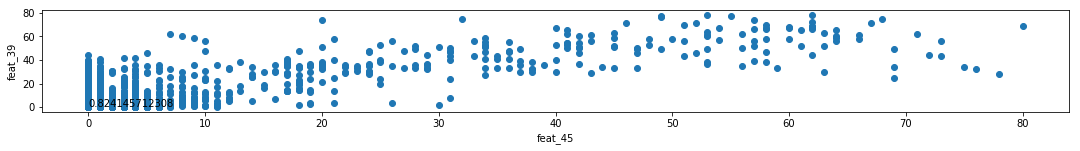

In [5]:
strong_correlation = correlation.where(correlation > 0.8)
strong_correlation = strong_correlation.dropna(how='all', axis=(0,1))
corr_features = strong_correlation[strong_correlation.notnull()].stack().index
corr_features_size = len(corr_features)
if corr_features_size:
    col = math.floor(math.log2(corr_features_size)) or 1
    row = math.ceil(corr_features_size/col)
    figure, axis = plt.subplots(row, col, figsize=[15,2*row])
    figure.tight_layout()
    for idx, (feature1, feature2) in enumerate(corr_features):
        if row == 1: # Has a single element
            plot = axis.scatter(df_train[feature1],df_train[feature2])
            plot = axis.set_xlabel(feature1)
            plot = axis.set_ylabel(feature2)
            plot = axis.annotate(strong_correlation[feature2][feature1],xy=(0,0))
        elif col == 1: # Has multiples elements, but is a array
            plot = axis[idx].scatter(df_train[feature1], df_train[feature2])
            plot = axis[idx].set_xlabel(feature1)
            plot = axis[idx].set_ylabel(feature2)
            plot = axis[idx].annotate(strong_correlation[feature2][feature1],xy=(0,0))
        else: # Multitle elements and is a matrix
            plot = axis[int(idx/col), idx%col].scatter(df_train[feature1], df_train[feature2])
            plot = axis[int(idx/col), idx%col].set_xlabel(feature1)
            plot = axis[int(idx/col), idx%col].set_ylabel(feature2)
            plot = axis[int(idx/col), idx%col].annotate(strong_correlation[feature2][feature1],xy=(0,0))
    plt.show()

## Resultado

A correlação mostra que não há uma fortíssima correlação entre as features, entretanto, há 10 colunas que estão fortemente correlacionadas. Porem buscamos uma correlação fortíssima para não remover features com comportamentos diferentes.

# Train/Test split

Utilizaremos 80% da base de treino para efetivamente treinar o modelo e 20% para averiguar a performance do modelo.

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

X = df_train
y = df_target.categories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Feature Scaling

Trata-se do processo de transformar todos os dados da amostra para uma unidade padrão, neste problema utilizaremos a técnica de padronização que consiste em remover a média dos dados e colocar todos na escala do desvio padrão [Wikipedia](https://en.wikipedia.org/wiki/Feature_scaling). Em que $\bar{x}$ é a média e $\sigma$ é o desvio padrão.

\begin{equation}
    x' = \frac{x - \bar{x}}{\sigma}
\end{equation}

In [7]:
sc_X = StandardScaler()
sc_X_train = sc_X.fit_transform(X_train)
sc_X_test = sc_X.transform(X_test)

Feature scaling foi aplicado nos dataframes de **features** e utilizado nos modelos, mas o resultado não apresentou mudança. Os modelos continuaram com exatamente as mesmas performances.

## Confusion Matrix

A matriz de confução é uma métrica para algorítmos supervisionados em que é possível estabelecer uma relação entre os acertos e erros durante a classificação do conjunto de amostras. Basicamente elabora-se uma matriz em que nas colunas e linhas são as possíveis classes. Cada célula traz a contagem de amostras que eram da Label X (coluna) e foram classificadas na Label Y (linha). Dessa forma, na matriz, a diagonal principal trará os acertos do classificador [Microsoft](https://docs.microsoft.com/pt-br/sql/analysis-services/data- mining/classification-matrix-analysis-services-data-mining).

 Veja o exemplo a seguir:

|Classificador\Real|Label 1|Label 2|Label 3|
|---|-------|-------|-------|
|**Label 1**|10|10|0|
|**Label 2**|1|10|1|
|**Label 3**|0|0|3|

Plot para matriz de confusão encontrado em [Scikit](http://scikit- learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx- glr-auto-examples-model-selection-plot-confusion-matrix-py) e adaptado para o problema

In [8]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(11, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Modelo Dummy Classifier

Dummy Classifier é um modelo que faz predições usando regras simples.

O dummy é importante para termos como parâmetro de comparação com outros modelos.Não pode ser utilizado em problemas reais porque ele é apenas para realizar comparações e trabalha com aleatoriedade e frequencia de repetições para realizar as predições.


Usamos dois tipos de estratégia:

* **Stratified**: realiza predições baseadas na distribuição das classes da base de treino. (Ex.: 10% A, 20% B, 50% C, 20% D)
* **Most Frequent**: sempre prediz com a classe mais frequente na base de treino

Confusion matrix, without normalization


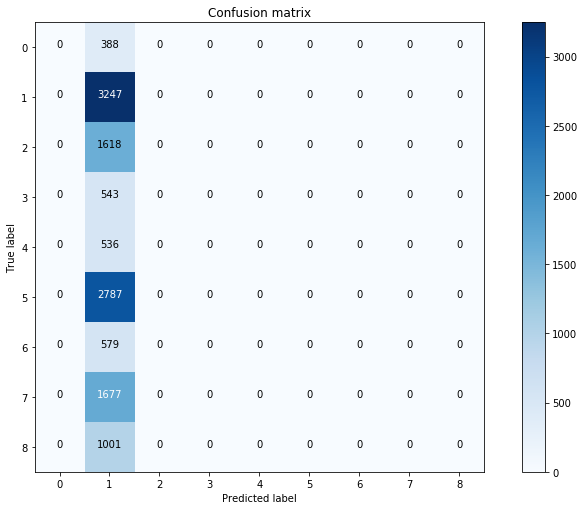

most_frequent train dataset score: 0.26
Média: 0.26
Desvio padrão: 0.0001
Confusion matrix, without normalization


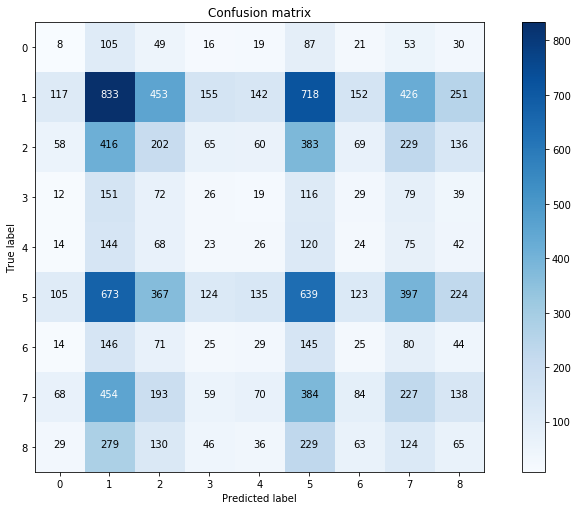

stratified train dataset score: 0.17
Média: 0.17
Desvio padrão: 0.0051


In [9]:
from sklearn.dummy import DummyClassifier

def dummies(X_train, y_train, X_test, y_test):
    models = ['most_frequent', 'stratified']

    for model in models:
        clf = DummyClassifier(strategy=model)
        clf.fit(X_train, y_train)
        score = clf.score(X_train, y_train)
        y_pred = clf.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        plot_confusion_matrix(cm, classes=model)
        # Cross validation
        accuracies = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10)
        
        add_results(model, clf.score(X_train, y_train), clf.score(X_test, y_test))
        print(model, 'train dataset score: %.2f' % score)
        print('Média: %.2f' % accuracies.mean())
        print('Desvio padrão: %.4f' % accuracies.std())

dummies(X_train, y_train, X_test, y_test)

## Boosting

A definição de boosting é que até mesmo algorítmos fracos de machine larning podem se tornar potentes [(KEARNS, 1988)](https://www.cis.upenn.edu/~mkearns/papers/boostnote.pdf).

Um algorítmo fraco de aprendizagem pode ser definido como modelos ou regras que não possuem boa acurácia ou aparentam ser ineficientes, tais como modelos *dummy*: mais frequente, estratificado, randômico. Já algorítmos de aprendizagem forte, são aqueles que apresentam uma boa taxa de acertos [(FREUND e SCHAPIRE)](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=4BF3325D8222B3234BB95971FCAD8759?doi=10.1.1.56.9855&rep=rep1&type=pdf).

**Exemplo - Corrida de cavalos**[(FREUND e SCHAPIRE)](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=4BF3325D8222B3234BB95971FCAD8759?doi=10.1.1.56.9855&rep=rep1&type=pdf):

    Como determinar em qual cavalor apostar, considerando um conjunto de dados disponíveis tais como informações do cavalo, do dono, das corridas anteriores e etc. Ao perguntar para especialistas cada um deles irá falar coisas distintas e ainda assim muito imprecisas (modelos fracos)! Mas seria possível utilizar as regras de aposta de cada especialista e gerar uma única regra que seja capaz de predizer o cavalor vencedor da corrida utilizando boost 

## Gradient Descent

![](http://matthewemery.ca/images/gradient_descent.gif)


Um algorítmo de gradient descendent é uma forma de minimizar o valor de uma função interativamente, na qual são dados um conjunto de parametros e ela busca a partir daí o menor valor[(TOUSSAINT, 2012)](https://ipvs.informatik.uni- stuttgart.de/mlr/marc/notes/gradientDescent.pdf). De forma que:

\begin{equation}
    y_{min} = F(x_1) > F(x_2) > F(x_3) > ... > F(x_n),\ onde:\ F(x_n) < precisão
\end{equation}

Um pseudo algorítmo que pode ser proposto para um problema de gradient é:

    x = inital_value
    step = 0.01
    repita
        xprev=x
        x = xperv - step * F(xprev)
    enquanto abs(x - xprev) > precisao

# XGBoost

XGBoost é um algoritmo que implementa *gradient boosting* de Decision Trees de forma rápida e com alta performance.  **Gradient Boosting** é uma técnica de *machine learning* para problemas de regressão e classificação que produz um modelo de predição na forma de *ensemble* de modelos de predições fracas, normalmente árvores de decisões.  Boosting é um processo sequencial, mas como o `XGBoost` consegue implementá-lo de forma paralela?  Sabemos que cada árvore pode ser produzida apenas depois que produzida a árvore anterior, mas o processo de criar as árvores pode ser paralelizado utilizando todos os núcleos a disposição.

## Model

### Objective Function:

\begin{equation}
    \text{obj}(\theta) = L(\theta) + \Omega(\theta)
\end{equation}

**L- Training Loss function**: Mede predição do modelo na base de treino.  (Métrica: *Mean Squared Error*(MSE))   
**Omega- Regularization function **: Controla a complexidade do modelo (Ajuda a evitar o *Overfitting*)

nota: As *objective functions* devem sempre possuir *training loss* e *regularization*

![](https://raw.githubusercontent.com/dmlc/web- data/master/xgboost/model/step_fit.png)

### CART

Uso de *CARTs* (Classification And Regression Trees) no ensemble das árvores 

![](https://raw.githubusercontent.com/dmlc/web- data/master/xgboost/model/twocart.png)


Modelo de ensemble de árvores IGUAL ao modelo Random Forest, mas onde está então a diferença?

## Training

### Additive

Training:

Precisamos agora melhorar os paramêtros da função de **Regularization**, mas como fazer isso? Fazer isso aqui é muito mais difícil do que em problemas de otimização tradicionais, onde você pode usar o gradiente para isso. Não é fácil treinar todas as árvores ao mesmo tempo. Em vez disso, usamos uma **estratégia aditiva**: consertamos o que aprendemos e adicionamos uma nova árvore de cada vez.


\begin{split}\hat{y}_i^{(0)} &= 0\\
    \hat{y}_i^{(1)} &= f_1(x_i) = \hat{y}_i^{(0)} + f_1(x_i)\\
    \hat{y}_i^{(2)} &= f_1(x_i) + f_2(x_i)= \hat{y}_i^{(1)} + f_2(x_i)\\
    &\dots\\
    \hat{y}_i^{(t)} &= \sum_{k=1}^t f_k(x_i)= \hat{y}_i^{(t-1)} + f_t(x_i)
\end{split}

XGBoost fit
XGBoost train score
XGBoost test score
XGBoost confusion matrix
XGBoost cross validation
XGBoost results
Confusion matrix, without normalization


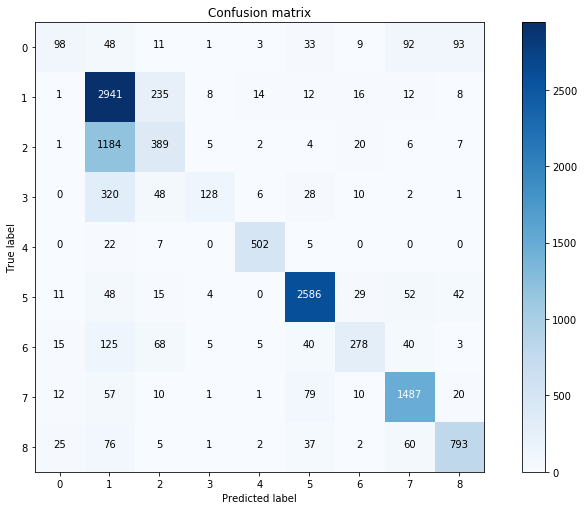

Resultado na base de treino 0.75
Resultado Médio na base de teste: 0.74
Desvio padrão: 0.0056
CPU times: user 45min 30s, sys: 9.53 s, total: 45min 39s
Wall time: 12min 23s


In [10]:
%%time
from xgboost import XGBClassifier

def xgboost(X_train, y_train, X_test, y_test):    
    xgbclf = XGBClassifier(
        learning_rate=0.01,
        n_estimators=140,
        max_depth=6,
        min_child_weight=6,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        nthread=8,
        scale_pos_weight=1
        )
    print('XGBoost fit')
    xgbclf.fit(X_train, y_train)
    print('XGBoost train score')
    train_score = xgbclf.score(X_train, y_train)
    print('XGBoost test score')
    y_pred = xgbclf.predict(X_test)

    print('XGBoost confusion matrix')
    cm = confusion_matrix(y_test, y_pred)

    print('XGBoost cross validation')
    accuracies = cross_val_score(estimator=xgbclf, X=X_train, y=y_train, cv=10)
    
    print('XGBoost results')
    add_results('xgboost', xgbclf.score(X_train, y_train), xgbclf.score(X_test, y_test))
    
    plot_confusion_matrix(cm, classes=xgbclf)
    print('Resultado na base de treino %.2f' % train_score)
    print('Resultado Médio na base de teste: %.2f' % accuracies.mean())
    print('Desvio padrão: %.4f' % accuracies.std())
    

xgboost(X_train, y_train, X_test, y_test)

# GridSearchCV

A ferramenta GridSearch disponibilizada pelo Scikit, gera de forma exaustiva candidatos a partir de um grid de  parâmetros especificados com o atributo param_grid.

In [11]:
dt_params = [{
    'max_depth': [40, 50, 60, 80, 100, 120],
    'max_features': [70, 80, 90, 92],
    'min_samples_leaf': [2, 5, 10, 20, 30, 40]
}]

xgb_params = [{
    'max_depth': [4, 5, 6],
    'min_child_weight': [4, 5, 6]
}]

In [12]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def search_params(classifier, params):
    clf = classifier()
    grid_search = GridSearchCV(estimator=clf,
                              param_grid=params,
                              cv = 10,
                              n_jobs=-1)

    grid_search = grid_search.fit(X_train, y_train)
    print(grid_search.best_score_, grid_search.best_params_)
    return grid_search.best_score_

CPU times: user 20 ms, sys: 10 ms, total: 30 ms
Wall time: 371 ms


## Aplicando GridSearchCV ao XGBClassifier:

In [13]:
%%time
from xgboost import XGBClassifier

# Takes long time to run
search_params(XGBClassifier, xgb_params)

0.797705143227 {'max_depth': 6, 'min_child_weight': 6}
CPU times: user 2min 44s, sys: 667 ms, total: 2min 45s
Wall time: 1h 30min 54s


## Aplicando GridSearchCV ao Decision Tree Classifier:

In [14]:
search_params(DecisionTreeClassifier, dt_params)

0.724374772736 {'max_depth': 50, 'max_features': 70, 'min_samples_leaf': 10}


0.72437477273645512

# Trees

## Decision Tree

Os dados são separados recursivamente formando uma árvore de decisão baseada nas features.Pode-se definir uma árvore de decisão, conforme diz (MITCHELL, 1997), como um método para aproximar valores discretos em funções, onde a função de aprendizagem é representada por uma árvore de decisão. Tais árvores aprendidas podem ser representadas - a nível de código fonte - como conjuntos de estruturas condicionais "se-então" para melhorar a leitura e entendimento humano, de acordo com (MITCHELL, 1997).

Estes algoritmos são muito utilizados, segundo (MITCHELL, 1997), na área de algoritmos de inferência indutiva, e dentre as aplicações de tais algoritmos, tem-se máquinas que aprenderam a diagnosticar casos da medicina, ou ainda, para avaliar o risco de inadimplência dos requerentes de créditos em bancos.

Para visualizar de forma mais fácil a representação de uma árvore, a figura 3, representada abaixo, caracteriza uma árvore de decisão em que a máquina deve decidir com base nas variáveis do tempo (ensolarado, nublado ou chuvoso), se pode ou não ocorrer uma partida de tênis. Além das variáveis de tempo, tem-se outras variáveis que podem ser levadas em conta dependendo da condição climática local, como umidade (alta ou normal) e o vento (forte ou fraco).

![Workflow Random forest](arvore_jogo_tenis.png)

O algoritmo de árvores de decisão classifica instâncias ou dados, ordenando-os apartir da raiz da árvore, para os nós de suas folhas. Cada nó da árvore exemplifica uma pergunta (teste) de alguns - atributos - de instância, e cada ramo descendente de um nó corresponde para um dos possíveis valores de tal atributo (MITCHELL, 1997). Vale a pena citar: O algoritmo ID3 (QUINLAN, 1986) aprende sobre árvores de decisão construindo-as de cima para baixo (nó raiz para as ramificações) tentando buscar respostas para a pergunta "Qual atributo devemos testar na raiz da árvore?", sendo assim, cada atributo instanciado é calculado por meio de testes estatísticos, para determinar o quão bem (ótimo) tal atributo, isolado dos demais, classifica os exemplos de treinamento.

Quando o melhor atributo é selecionado e utilizado como teste no nó principal da árvore, cria-se um descendente para cada valor admissível deste atributo e os exemplos de treinamento são sorteados para o nó filho mais apropriado. O processo inteiro é então repetido utilizando treinamentos associados a cada descendente para selecionar o melhor atributo para testar na árvore. Quando realizado dessa forma, o algoritmo tenta de forma “gulosa“3.4. O modelo 49 Figura 3 – Exemplo de árvore de decisão, sobre condições para realização de um jogo de tênis.

In [15]:
from sklearn.model_selection import cross_val_score

def fit_tree(X_train, y_train, X_test, y_test, tree_description='decision_tree'):
    tree_clf = DecisionTreeClassifier(max_features=70, min_samples_leaf=10, max_depth=40)
    tree_clf.fit(X_train, y_train)

    inner_score = tree_clf.score(X_train, y_train)
    tree_fit = cross_val_score(tree_clf, X_train, y_train)
    
    add_results(tree_description, tree_clf.score(X_train, y_train), tree_clf.score(X_test, y_test))
    
    return inner_score, tree_fit.mean(), tree_fit.std()

"inner: {:.2f} cross: {:.2f} +/- {:.2f}".format(*fit_tree(X_train, y_train, X_test, y_test))

'inner: 0.81 cross: 0.71 +/- 0.01'

## Distribuição dos dados

Um dos modelos a ser utilizado será o decision tree no método de montagem random forest. Este modelo de predição possui um problema de viés quando uma das classes na base de treino é mais predominante do que outra, ou seja, a distribuição das classes na base de treino devem ser semelhantes para evitar problemas de [overfiting](http://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html).

Para tanto, precisa-se descobrir qual a contagem de cada classe disponível na base de treino, montaremos um histograma para verificar a diferença entre elas.

In [16]:
counts = [0] *len(df_target.target.cat.categories)

def reduce(target):
    counts[target.categories] += 1
    return counts[target.categories]

df_target['increase_count'] = df_target.apply(reduce, axis=1)
df_target.groupby('target').count()
df_target.groupby('target')['increase_count'].max().sum() == df_target.target.count()

,categories,increase_count
target,,
Class_1,1929,1929
Class_2,16122,16122
Class_3,8004,8004
Class_4,2691,2691
Class_5,2739,2739
Class_6,14135,14135
Class_7,2839,2839
Class_8,8464,8464
Class_9,4955,4955


True

### Filtrar dados

Agora, iremos filtrar os dados deixando apenas os primeiros registros. O critério de filtrar os dados será pegar a classe que possue o menor número e utilizar ele como base para remover os demais, considerando um tamanho máximo de até 2x o da menor classe

In [17]:
distance_percent = 2
minimum_value = df_target.groupby('target')['increase_count'].max().min()
df_rtarget = df_target[ df_target.increase_count < minimum_value*distance_percent ]
df_rtarget.groupby('target').count()
df_rtrain = df_train.drop( df_target[df_target.increase_count >= minimum_value * distance_percent].index )
df_rtrain.shape[0] == df_rtarget.shape[0]

,categories,increase_count
target,,
Class_1,1929,1929
Class_2,3857,3857
Class_3,3857,3857
Class_4,2691,2691
Class_5,2739,2739
Class_6,3857,3857
Class_7,2839,2839
Class_8,3857,3857
Class_9,3857,3857


True

### Verificando resultado

Após aplicar uma melhor distribuição nos dados, rodou-se novamene o algorítmo da decision tree e percebeu-se que a acurácia do modelo diminuiu, e portanto, não será utilizado.

In [18]:
X_tr, X_te, y_tr, y_te = train_test_split(df_rtrain, df_rtarget.target, test_size=0.2)
"inner: {:.2f} cross: {:.2f} +/- {:.2f}".format(*fit_tree(X_tr, y_tr, X_te, y_te))

'inner: 0.77 cross: 0.65 +/- 0.00'

# Random Forest

Breiman breiman, 2001, descreve Random Forests como uma evolução das decisions trees, onde várias ávores são formadas para criar um modelo com maior precisão.  Isto é feito a partir da separação dos Dados em conjutos de dados menores e aleatórios. Cada árvore é contruida a partir de um pedaço aleatório dos dados. Quando um novo dado chega, a predição é feita por todas as Árvores e ao fim é feita uma votação por maioria, ou seja, a categoria com mais votos ganha e o resultado é dado.

![Workflow Randomforest](forest.jpg)

De acordo com breiman, 2001, as RFs corrigem a maior parte dos problemas de Overfitting que as Árvores de decisão apresentam. Tudo depende do quanto as DT contidas dentro da Random Forest. Isto é, o quanto elas representam os dados.

## Utilizando o algoritmo

In [25]:
from sklearn.ensemble import RandomForestClassifier

def test_random(params, X_train, y_train, X_test, y_test, name='random_forest'):
    rfclf = RandomForestClassifier(**params)
    rfclf = rfclf.fit(X_train, y_train)
    
    train_score = rfclf.score(X_train, y_train)
    test_score = rfclf.score(X_test, y_test)

    add_results(name, train_score, test_score)
    return name, train_score, test_score
params = {'n_estimators': 10, 'max_features': 70, 'min_samples_leaf': 10, 'max_depth': 40}
test_random({}, X_train, y_train, X_test, y_test)
test_random(params, X_train, y_train, X_test, y_test, 'random_forest_otimized')

('random_forest', 0.9920003232192639, 0.77957336780866193)

('random_forest_otimized', 0.84002666558926908, 0.7690691661279897)

## Verificando com Cross Validation

Cross validation irá predizer um pedaço do dataset utilizando o modelo treinado com o resto dos dados que não fazem parte deste dataset.

In [26]:
rfclf = RandomForestClassifier(**params)
rfclf.fit(X_train, y_train)
rfscores = cross_val_score(rfclf, X_train, y_train)
print ("{} de precisão".format(rfscores.mean() * 100))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features=70, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

76.09793654862037 de precisão


## Importancia das features para a RF

A seguir vemos quais as influências de cada uma das features para o uso no random forest. Quanto maior no gráfico, maior é a importância da feature.

### Gini

O método utilizado para gerar a importância das features no modelo é a Decrease Mean Importance, que utiliza em seus cálculos um indicador de impureza no sistema. No caso do random forest implementado [(LOUPPE et al.,2013)](https://pdfs.semanticscholar.org/2635/19c5a43fbf981da5ba873062219c50fdf56d.pdf), este indicador é o Gini Impurity que pode ser entendido como uma redução da probabilidade de errar a classificação de uma categoria dentro de um algorítmo de árvore [(Sebastian Raschaka)](https://sebastianraschka.com/faq/docs/decision-tree-binary.html).

#### O indice

O indice de Gini pode ser calculado utilizando a seguinte fórmula[(TEKIMONO,2009)](http://people.revoledu.com/kardi/tutorial/DecisionTree/how-
to-measure-impurity.htm):

\begin{equation}
    Gini = 1- \sum_{i=1} p_i^2
\end{equation}

Em que $p_i$ é a probabilidade da ocorrência de uma determinada classe, desconsiderando os atributos. Ou seja $N_i$ é o número de ocorrências da classe i e N é o total de elementos das classes:

\begin{equation}
    p_i = \frac{N_i}{N}
\end{equation}

#### Para Decisions Trees

Para Classification and Regression Trees (CART), utiliza-se o indice de Gini modificado, isto é, calcula-se ainda as probabilidades em $p_i$, mas agora utiliza-se do indice de Gini nos filhos da esquerda $t_l$ e direita $t_r$. Recalcula-se as probabilidades para ambos os nós também em $p_l$ e $p_r$ utilizando como base as possíveis classes reduzidas a $N_t$ [(LOUPPE et al.,2013)](https://pdfs.semanticscholar.org/2635/19c5a43fbf981da5ba873062219c50fdf56d.pdf).

\begin{equation}
    i(s, t) = Gini(t) - p_l Gini(t_l) - p_r Gini(t_r) \\
    p(t) = \frac{N_{l|r}}{N_t}
\end{equation}

#### Decrease Mean Importance

Para calcular a importância de uma feature X ao tentar predizer uma label Y, utiliza- se os indices de impureza com a proporção de $N_f$ amostras em relação ao total $N$.  $N_T$ é o total de árvores na floresta. Assim, para uma Random Forest a conta é:

\begin{equation}
    I(X_m) = \frac{1}{N_T} \sum_{T} \sum_{t \epsilon T:v(s)=X_m} pf(t)i(s,t) \\
    pf(f) = \frac{N_f}{N}
\end{equation}

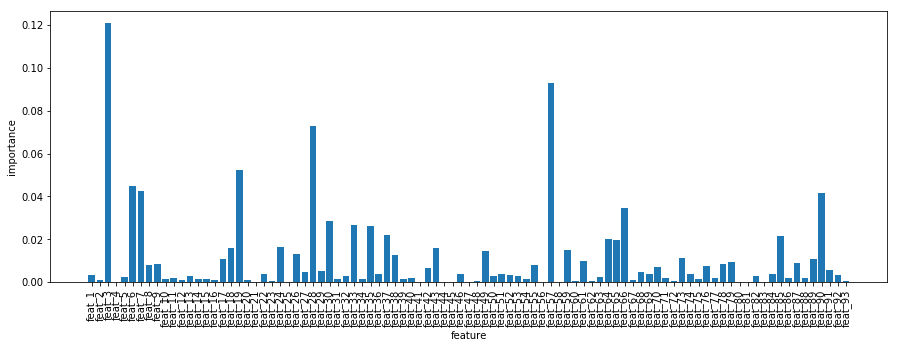

In [29]:
fig, axis = plt.subplots(figsize=(15, 5))
plot = axis.bar(df_train.columns, rfclf.feature_importances_)
plot = axis.set_xticklabels(df_train.columns.values, rotation='vertical')
plot = axis.set_xlabel('feature')
plot = axis.set_ylabel('importance')
plt.show()

## ExtraTrees

O [Scikit Learn](http://scikit- learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) nos apresenta um tipo diferente de random forest que pode apresentar resultados melhores que o [RandomForestClassifier](http://scikit- learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).  Assim como afirma que as extra tree devem ser utilizadas apenas em algorítmos de montagem Como o Extra Trees Classifier e Regressor.

O que diferencia uma extra tree de uma decision tree é a forma que é feita a construção da árvore. Enquanto uma decision tree utiliza cópia dos dados e sub amostras para realizar as divisões de cada nó. Uma extra tree utiliza um ponto de divisão randomico e utiliza toda a base de treino para crescer a árvore [(GEURTS, ERNST e WEHENKEL, 2005)](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf).

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etscores = cross_val_score(etc, X_train, y_train)
print ("{} de precisão".format((etscores.mean() * 100)))

etc = etc.fit(X_train, y_train)
add_results('extra_trees', etc.score(X_train, y_train), etc.score(X_test, y_test))
print("Inner score", etc.score(X_train, y_train))

76.8898405821295 de precisão
Inner score 1.0


## Neurônio Artificial

![Workflow NeuralNetwork](neural.jpg)

#### Entrada

- Sinais de entrada {x1,x2,...,xn}.
- Cada sinal de entrada e ponderado por 1 peso.{w1,w2,...,wn}.
- O peso é adquirido a partir do treino.

#### Função agregadora

- Recebe todos os sinais e realiza a soma dos produtos dos sinais.

#### Neurônio

- Tem a função de deixar, passar ou inibir um sinal de saida de acordo com a entrada.
- Teta é a limiar de ativacao(ponderado),'u' é o potencial de ativação que é passado para a função (g(u)), que é a função de ativação que é responsavel pela saida que permite o sinal passar ou não ou até mesmo modificalo.

#### Formula

- Potencial de ativação

![Workflow Potencialdeativacao](formula.png)

### MLP Classifier

Esse algoritmo é um classificador Perceptron de Multicamadas usado para fazer o treinamento de modelos, e é uma biblioteca do Scikit-Learn.

In [31]:
%%time

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='adam',activation='relu',max_iter=250)
mlp.fit(X_train, y_train)
saidas = mlp.predict(X_test)
scoreTreino =  mlp.score(X_train, y_train)
scoreTeste =  mlp.score(X_test, y_test)

print('Score treino: ', scoreTreino)
print('Score teste: ', scoreTeste)

mlpscores = cross_val_score(mlp, X_train, y_train)

print('Score: {} +/- {}'.format(mlpscores.mean(), mlpscores.std()))

add_results('multi_layer_perceptron', scoreTreino, scoreTeste)

Score treino:  0.87135873298
Score teste:  0.785956690368
Score: 0.7825550109810641 +/- 0.007188504494548886
CPU times: user 4min 13s, sys: 4min 39s, total: 8min 52s
Wall time: 2min 17s


Confusion matrix, without normalization


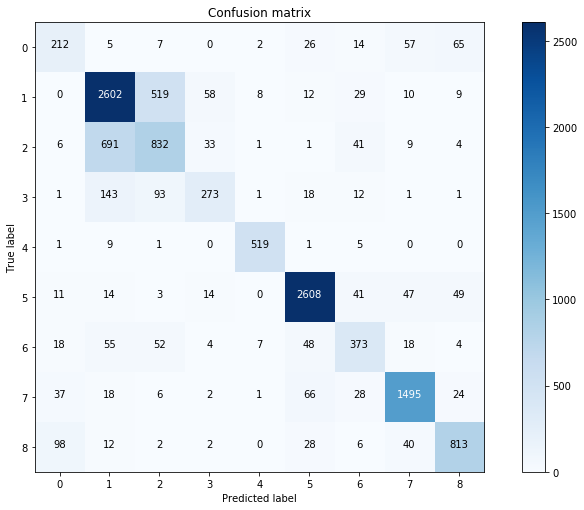

In [33]:
from sklearn.neural_network import MLPClassifier

mp = confusion_matrix(y_test,saidas);
plot_confusion_matrix(mp, classes=mlp)

## Preprocessamento de dados

A rede neural pode ter dificuldade em convergir antes de atingir o número máximo
de iterações permitido se os dados não forem normalizados. Multi-layer
Perceptron é sensível ao dimensionamento de features, portanto, é altamente
recomendável dimensionar seus dados. Usaremos o StandardScaler incorporado para
padronização.

In [39]:
%%time
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

CPU times: user 107 ms, sys: 3.33 ms, total: 110 ms
Wall time: 109 ms


In [40]:
%%time

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

CPU times: user 1min 21s, sys: 2min 14s, total: 3min 35s
Wall time: 57.6 s


             precision    recall  f1-score   support

          0       0.61      0.44      0.51       388
          1       0.73      0.79      0.75      3247
          2       0.53      0.50      0.52      1618
          3       0.59      0.51      0.55       543
          4       0.95      0.95      0.95       536
          5       0.94      0.93      0.94      2787
          6       0.70      0.60      0.65       579
          7       0.88      0.92      0.90      1677
          8       0.83      0.87      0.85      1001

avg / total       0.78      0.78      0.78     12376

Confusion matrix, without normalization


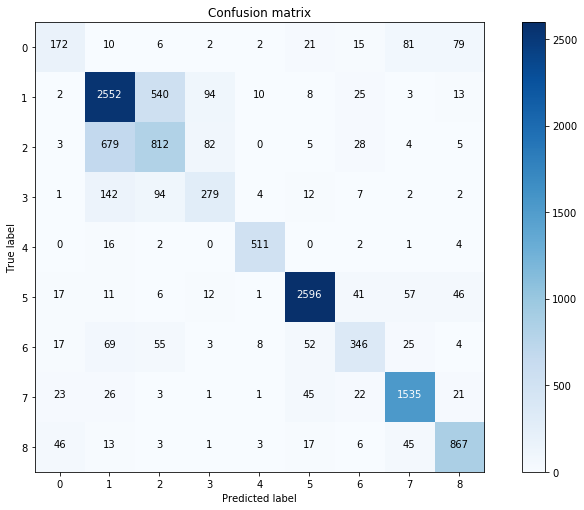

TypeError: add_results() takes 3 positional arguments but 5 were given

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
mp = confusion_matrix(y_test,predictions)
plot_confusion_matrix(mp, classes=mlp)
add_results('MultiLayerPerceptron parametrized', X_train, y_train, X_test, y_test)

coefs\_ é uma lista de matrizes de peso, onde a matriz de peso no índice i
representa os pesos entre a camada i e a camada i + 1.

intercepts\_ é uma lista de vetores de polarização, onde o vetor no índice i
representa os valores de polarização adicionados à camada i + 1.

In [41]:
print(len(mlp.coefs_), len(mlp.coefs_[0]), len(mlp.intercepts_[0]))

4 93 30


# Conclusão

Como conclusão, tivemos a utilização do modelo Random Forest e Extreme Gradient Boosting otimizados. Mas o gráfico a seguir irá mostrar os resultados com a base de treino e base de teste.

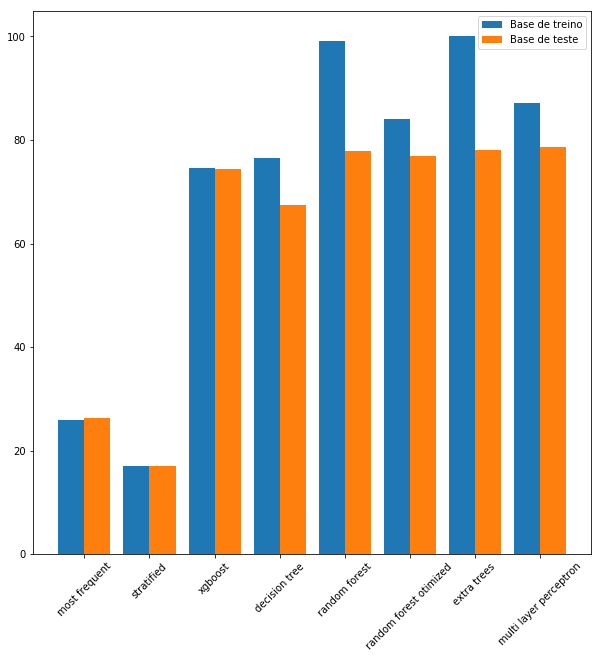

In [36]:
columns = [x.replace('_',' ') for x in results.keys()]
train = []
test = []
width=0.4
base = np.arange(len(columns))
for key in results:
    train.append(results[key]['train'])
    test.append(results[key]['test'])
fig, ax=plt.subplots(figsize=[10,10])
fig = ax.bar(base, train, width)
fig = ax.bar(base+width, test, width)
fig = ax.set_xticks(base+width/2)
fig = ax.set_xticklabels(columns, rotation='45')
fig = ax.legend(['Base de treino', 'Base de teste'])
plt.show()

# Referências Bibliográficas

http://scikit- learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html#sklearn.dummy.DummyClassifier

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning- xgboost-with-codes-python/

http://scikit- learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

ftp://ftp.sas.com/pub/neural/FAQ3.html#A_hu

[MITCHELL](https://dl.acm.org/citation.cfm?id=505283), Tom M. Machine learning.  1997. Burr Ridge, IL: McGraw Hill, v. 45, n. 37, p. 870-877, 1997.
[QUINLAN](http://hunch.net/~coms-4771/quinlan.pdf), J.. Ross . Induction of decision trees. Machine learning, v. 1, n. 1, p. 81-106, 1986.
[BREIMAN](https://www.stat.berkeley.edu/users/breiman/randomforest2001.pdf), Leo. Random forests. Machine learning, v. 45, n. 1, p. 5-32, 2001.

BABATUNDE, Oluleye, ARMSTRONG, Leisa, DIEPEVEEN, Dean e LENG, J. Comparative analysis of Genetic Algorithm and Particle Swam Optimization: An application in precision agriculture. 2015. **Asian Journal of Computer and Information Systems**. 3.  1-12.